In [ ]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.cm import get_cmap
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

import seaborn as sns
sns.set()

# Set random seed
np.random.seed(0)

plt.rc('font', family = 'serif')
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.titlesize'] =20 


In [2]:
# Define transfer function phi and Wilson-Cowan's SSN equations solved via Euler's Method

def phi(V,k,n,V0):
    return (k*(V-V0)**n)*((V-V0)>0)


def simulate_ssn(N_t, dt,  Ve_init, Vi_init, V_rest, u_e, u_i, tau_e, tau_i, Wee, Wie, Wei, Wii, k, n, V0): 
     
    """
    Inputs:
    N_t: Number of timesteps
    dt: Euler's method timestep measurement
    Ve_init: Initial condition for E potential
    Vi_init: Initial condition for I potential
    V_rest: Resting potential
    u_e: E feedforward current
    u_i: I feedforward current
    tau_e: E neuron time constant
    tau_i: I neuron time constant
    Wee, Wie, Wei, Wii: Weights for recurrent connections between E and I neurons
    k: k parameter for transfer function
    n: n parameter for transfer function
    V0: V_0 threshold for transfer function
    
    Returns:
    Ve: list of every E potential value for each timestep
    Vi: list of every I potential value for each timestep
    phi_e: list of every E firing rate value from transfer function for each timestep
    phi_i: list of every E firing rate value from transfer function for each timestep
    
    """

    Ve = np.zeros([N_t+1])
    Vi = np.zeros([N_t+1])
    phi_e = np.zeros([N_t])
    phi_i = np.zeros([N_t])
    
    Ve[0] = Ve_init
    Vi[0] = Vi_init
    
    for t in range(1,N_t+1):
        
        phi_e[t-1] = phi(Ve[t-1], k, n, V0)
        phi_i[t-1] = phi(Vi[t-1], k, n, V0)
        
        dVe = -(Ve[t-1] - V_rest) + Wee * phi_e[t-1] - Wei * phi_i[t-1] + u_e
        dVi = -(Vi[t-1] - V_rest) + Wie * phi_e[t-1] - Wii * phi_i[t-1] + u_i
        Ve[t] = Ve[t-1] + 1/tau_e * dt * dVe
        Vi[t] = Vi[t-1] + 1/tau_i * dt * dVi
        
        
        
    return Ve, Vi, phi_e, phi_i

# Initial parameters

k = 0.3
n = 2
V0 = -70
V_rest = -70
tau_e = 20
tau_i = 10
Wee = 1.25
Wei = 0.65
Wie = 1.2
Wii = 0.5
dt = 1

# Intial conditions
Ve_init = V_rest
Vi_init = V_rest


Question 2

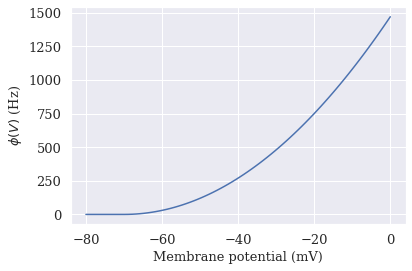

In [3]:
# Plot transfer function

k = 0.3
V0 = -70
n = 2

V = np.linspace(-80,0,80)

t_func=phi(V,k,n,V0)

fig, ax = plt.subplots(1,1, figsize = (6,4))
ax.plot(V,t_func)
ax.set_xlabel('Membrane potential (mV)',size=13)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=11)
ax.set_ylabel('$\phi(V)$ (Hz)',size=13)
fig.savefig('/Users/josehernandez/Documents/The University of Edinburgh/Academics/SEM2/CCN/Assignment 1/fig1.png',dpi=400)

plt.show()



Question 3

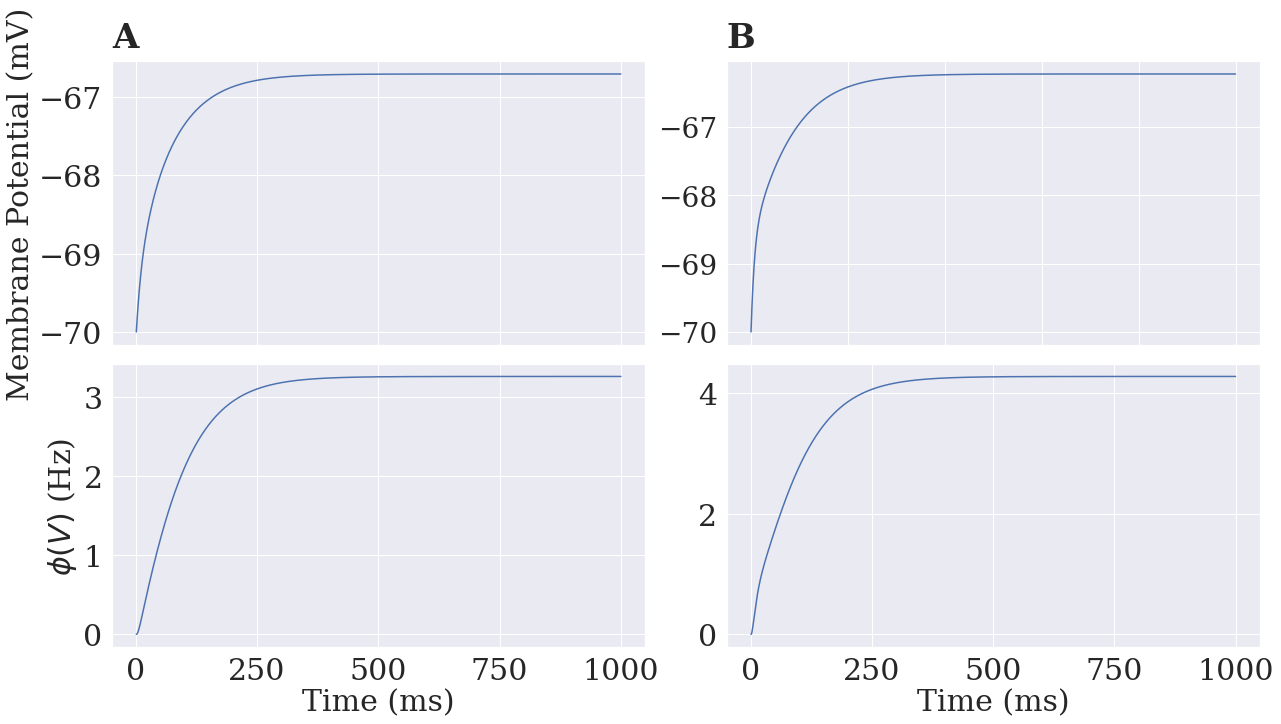

In [4]:
# Plot noiseless SSN behaviours for potential and firing rate (transfer function approximation)

u_e = 2
u_i = 2
N_t = 1000

Ve, Vi, phi_e, phi_i = simulate_ssn(N_t, dt,  Ve_init, Vi_init, V_rest, u_e, u_i, tau_e, tau_i, Wee, Wie, Wei, Wii, 
                                    k, n, V0)

time = np.linspace(1,1000,1000)



fig, ax = plt.subplots(2,2, figsize = (18,10))
ax[0,0].plot(time,Ve[:-1])
ax[0,0].set_ylabel('Membrane Potential (mV)',size=30)
ax[0,0].tick_params(axis='x', labelsize=30)
ax[0,0].tick_params(axis='y', labelsize=30)

ax[0,1].plot(time,Vi[:-1])
ax[0,1].tick_params(axis='x', labelsize=28)
ax[0,1].tick_params(axis='y', labelsize=28)

ax[1,0].plot(time,phi_e)
ax[1,0].set_xlabel('Time (ms)',size=30)
ax[1,0].set_ylabel('$\phi(V)$ (Hz)',size=30)
ax[1,0].tick_params(axis='x', labelsize=30)
ax[1,0].tick_params(axis='y', labelsize=30)

ax[1,1].plot(time,phi_i)
ax[1,1].set_xlabel('Time (ms)',size=30)
ax[1,1].tick_params(axis='x', labelsize=30)
ax[1,1].tick_params(axis='y', labelsize=30)

ax[0,0].xaxis.set_ticklabels([]) 
ax[0,1].xaxis.set_ticklabels([]) 


ax[0,0].text(0,1.05,"A",transform=ax[0,0].transAxes,fontsize=34,weight='bold')
ax[0,1].text(0,1.05,"B",transform=ax[0,1].transAxes,fontsize=34,weight='bold')

plt.tight_layout()
plt.show()
fig.savefig('/Users/josehernandez/Documents/The University of Edinburgh/Academics/SEM2/CCN/Assignment 1/fig3.png',dpi=400)


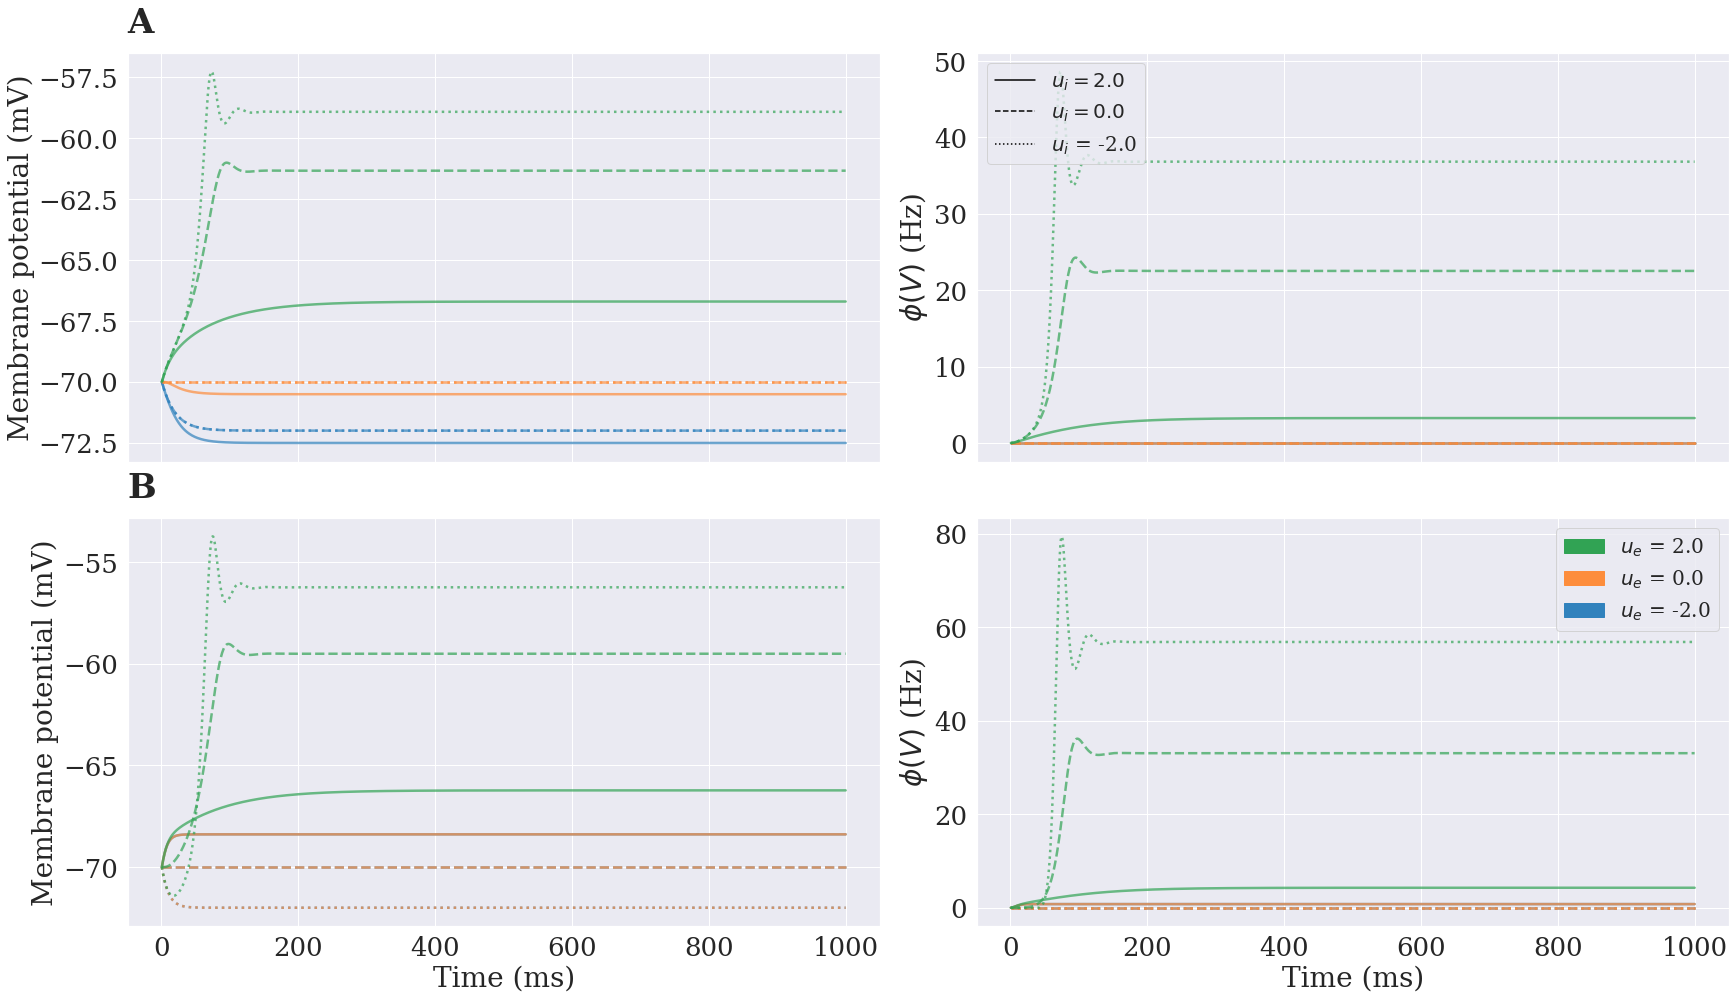

In [5]:
# Plot potential and firing rate (transfer function approximation) for different values of external current

N_t =1000

combs=3
u_e_list = np.linspace(-2,2,combs)
u_i_list = np.linspace(-2,2,combs)

cname="viridis"
cmap = get_cmap(cname)
my_map = ListedColormap(sns.color_palette("flare", as_cmap=False))

fig, ax = plt.subplots(2,2, figsize = (24,14))
color = iter(cm.rainbow(np.linspace(0, 0.3, combs**2)))
colors = np.linspace(0,1,5)

i = 0
q=0
old_y=0
list_y = []
list_y2=[]
flag=False
flag2=False
linestyle=['dotted','--','-']
lw=[2.5,2.5,2.5]
col_code=[0,5,8]
for c, u_e in enumerate(u_e_list):
    m=-1
    for u_i in u_i_list:
        m+=1
        if i%2 == 0:
            j = True
            
        else:
            j = False
        Ve, Vi, phi_e, phi_i = simulate_ssn(N_t, dt,  Ve_init, Vi_init, V_rest, u_e, u_i, tau_e, tau_i, Wee, Wie, Wei, Wii, 
                                    k, n, V0)
        
        
            
        ax[0,0].plot(time,Ve[:-1],color=cm.tab20c(col_code[c]),lw=lw[m],linestyle=linestyle[m],alpha=0.7)
        
        
        line=ax[0,0].lines[-1]
        y = line.get_ydata()[-1]
        
        if q>0:
            
            res=np.any((np.abs(y - list_y) < 0.2))
            wh=np.where((np.abs(y - list_y) < 0.2))[0]
            
            if  res:
                if list_y[wh[0]]>y:
                    r = -0.5+(np.abs(y - list_y[wh[0]]))
                else:
                    r = 0.5-(np.abs(y - list_y[wh[0]]))
            else:
                r = 0
        list_y.append(y)
        
        
        ax[1,0].plot(time,Vi[:-1],color=cm.tab20c(col_code[c]),lw=lw[m],linestyle=linestyle[m],alpha=0.7)
        
        line2=ax[1,0].lines[-1]
        y2 = line2.get_ydata()[-1]
        
        if q>0:
            
            res=np.any((np.abs(y2 - list_y2) < 0.2))
            wh=np.where((np.abs(y2 - list_y2) < 0.2))[0]
            
            if  res:
                if list_y2[wh[0]]>y:
                    r = -0.5+(np.abs(y2 - list_y2[wh[0]]))
                else:
                    r = 0.5-(np.abs(y2 - list_y2[wh[0]]))
            else:
                r = 0
        list_y2.append(y2)
        
        
        
        ax[0,1].plot(time,phi_e,color=cm.tab20c(col_code[c]),lw=lw[m],linestyle=linestyle[m], alpha=0.7)
        ax[1,1].plot(time,phi_i,color=cm.tab20c(col_code[c]),lw=lw[m],linestyle=linestyle[m], alpha=0.7)
        
        q+=1
        
        

uen2 = mpatches.Patch(color=cm.tab20c(0), label='$u_e$ = -2.0')
uen0 = mpatches.Patch(color=cm.tab20c(5), label='$u_e$ = 0.0')
ue2 = mpatches.Patch(color=cm.tab20c(8), label='$u_e$ = 2.0')


uin2 = mpatches.Patch(color=cm.binary(255),linestyle='dotted', label='$u_i$ = -2.0')
uin0 = mpatches.Patch(color=cm.binary(255),linestyle='-.', label='$u_i$ = 0.0')
ui2 = mpatches.Patch(color=cm.binary(255),linestyle='--', label='$u_i$ = 2.0')
ui4 = mpatches.Patch(color=cm.binary(255),linestyle='-', label='$u_i$ = 4.0')

ax[1,0].set_xlabel("Time (ms)",size=28)
ax[0,0].set_ylabel("Membrane potential (mV)",size=28)
ax[1,0].set_ylabel("Membrane potential (mV)",size=28)

ax[0,1].set_ylabel("$\phi(V)$ (Hz)",size=28)
ax[1,1].set_ylabel("$\phi(V)$ (Hz)",size=28)


line = Line2D([0,1],[0,1],linestyle='-', color='black')
line2 = Line2D([0,1],[0,1],linestyle='--', color='black')
line3 = Line2D([0,1],[0,1],linestyle='dotted', color='black')



ax[0,1].legend([line,line2,line3],['$u_i = 2.0$','$u_i = 0.0$','$u_i$ = -2.0'],prop={'size': 20})


ax[1,1].set_xlabel("Time (ms)",size=28)
ax[1,1].legend(handles=[ue2,uen0,uen2],prop={'size': 20})  
ax[0,0].text(0,1.05,"A",transform=ax[0,0].transAxes,fontsize=34,weight='bold')
ax[1,0].text(0,1.05,"B",transform=ax[1,0].transAxes,fontsize=34,weight='bold')
ax[1,0].tick_params(axis='x', labelsize=26)
ax[1,0].tick_params(axis='y', labelsize=26)
ax[1,1].tick_params(axis='x', labelsize=26)
ax[1,1].tick_params(axis='y', labelsize=26)
ax[0,1].tick_params(axis='x', labelsize=26)
ax[0,1].tick_params(axis='y', labelsize=26)
ax[0,0].tick_params(axis='x', labelsize=26)
ax[0,0].tick_params(axis='y', labelsize=26)
ax[0,0].xaxis.set_ticklabels([]) 
ax[0,1].xaxis.set_ticklabels([]) 
plt.tight_layout()
plt.show()

fig.savefig('/Users/josehernandez/Documents/The University of Edinburgh/Academics/SEM2/CCN/Assignment 1/Fig4.png',dpi=400)




Question 4

In [6]:
# Design simulation function for noisy SSN

def simulate_ssn_noise(N_t, dt,  Ve_init, Vi_init, V_rest, mu_e, mu_i, sigma_e, sigma_i, tau_e, tau_i, Wee, Wie, Wei, Wii, k, n, V0): 
     
    """
    Inputs:
    N_t: Number of timesteps
    dt: Euler's method timestep measurement
    Ve_init: Initial condition for E potential
    Vi_init: Initial condition for I potential
    V_rest: Resting potential
    mu_e: E feedforward current centered at mu_e
    mu_i: I feedforward current centered at mu_i
    sigma_e: standard deviation for the feedforward E current
    sigma_i: standard deviation for the feedforward I current
    tau_e: E neuron time constant
    tau_i: I neuron time constant
    Wee, Wie, Wei, Wii: Weights for recurrent connections between E and I neurons
    k: k parameter for transfer function
    n: n parameter for transfer function
    V0: V_0 threshold for transfer function
    
    Returns:
    Ve: list of every E potential value for each timestep
    Vi: list of every I potential value for each timestep
    phi_e: list of every E firing rate value from transfer function for each timestep
    phi_i: list of every E firing rate value from transfer function for each timestep
    
    """
    

    Ve = np.zeros([N_t+1])
    Vi = np.zeros([N_t+1])
    phi_e = np.zeros([N_t])
    phi_i = np.zeros([N_t])
    
    Ve[0] = Ve_init
    Vi[0] = Vi_init
    
    for t in range(1,N_t+1):
        
        #ran = np.random.randn(1)
        
        u_e = mu_e + sigma_e*np.random.randn(1)
        u_i = mu_i + sigma_i*np.random.randn(1)
        
        phi_e[t-1] = phi(Ve[t-1], k, n, V0)
        phi_i[t-1] = phi(Vi[t-1], k, n, V0)
        
        dVe = -(Ve[t-1] - V_rest) + Wee * phi_e[t-1] - Wei * phi_i[t-1] + u_e
        dVi = -(Vi[t-1] - V_rest) + Wie * phi_e[t-1] - Wii * phi_i[t-1] + u_i
        Ve[t] = Ve[t-1] + 1/tau_e * dt * dVe
        Vi[t] = Vi[t-1] + 1/tau_i * dt * dVi
        
        
        
    return Ve, Vi, phi_e, phi_i





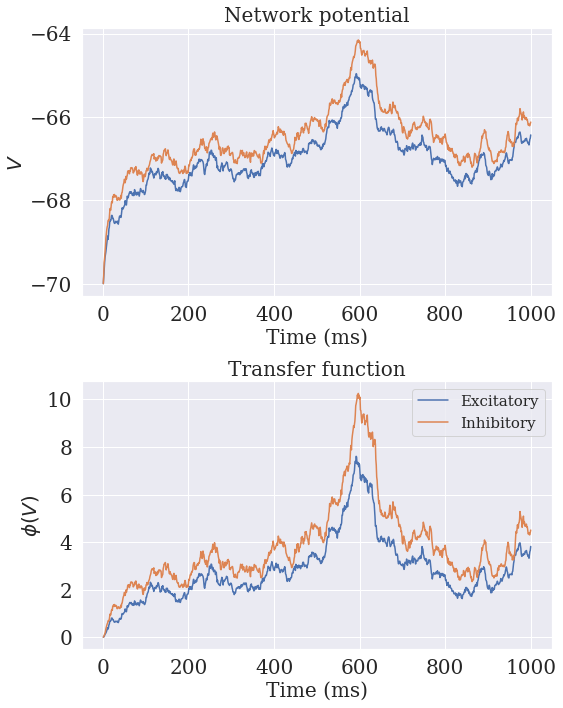

In [7]:
# Plot 1 samples of E and I potential and firing rate (under the transfer function approximation) across time


N_t=1000
sigma_e = 1
sigma_i = 0.5
u_e = 2
u_i = 2

Ve, Vi, phi_e, phi_i = simulate_ssn_noise(N_t, dt,  Ve_init, Vi_init, V_rest, u_e, u_i, sigma_e, sigma_i, tau_e, tau_i, Wee, Wie, Wei, Wii, k, n, V0)

time = np.linspace(1,1000,1000)



fig, ax = plt.subplots(2,1, figsize = (8,10))
ax[0].plot(time,Ve[:-1])
ax[0].plot(time,Vi[:-1])
ax[0].set_title('Network potential')
ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('$V$')
ax[1].plot(time,phi_e,label = "Excitatory")
ax[1].plot(time,phi_i,label = "Inhibitory")
ax[1].set_title('Transfer function')
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('$\phi(V)$')
plt.tight_layout()
plt.legend(prop = {'size': 15})

plt.show()
fig.savefig('/Users/josehernandez/Documents/The University of Edinburgh/Academics/SEM2/CCN/Assignment 1/Fig5.png',dpi=400)


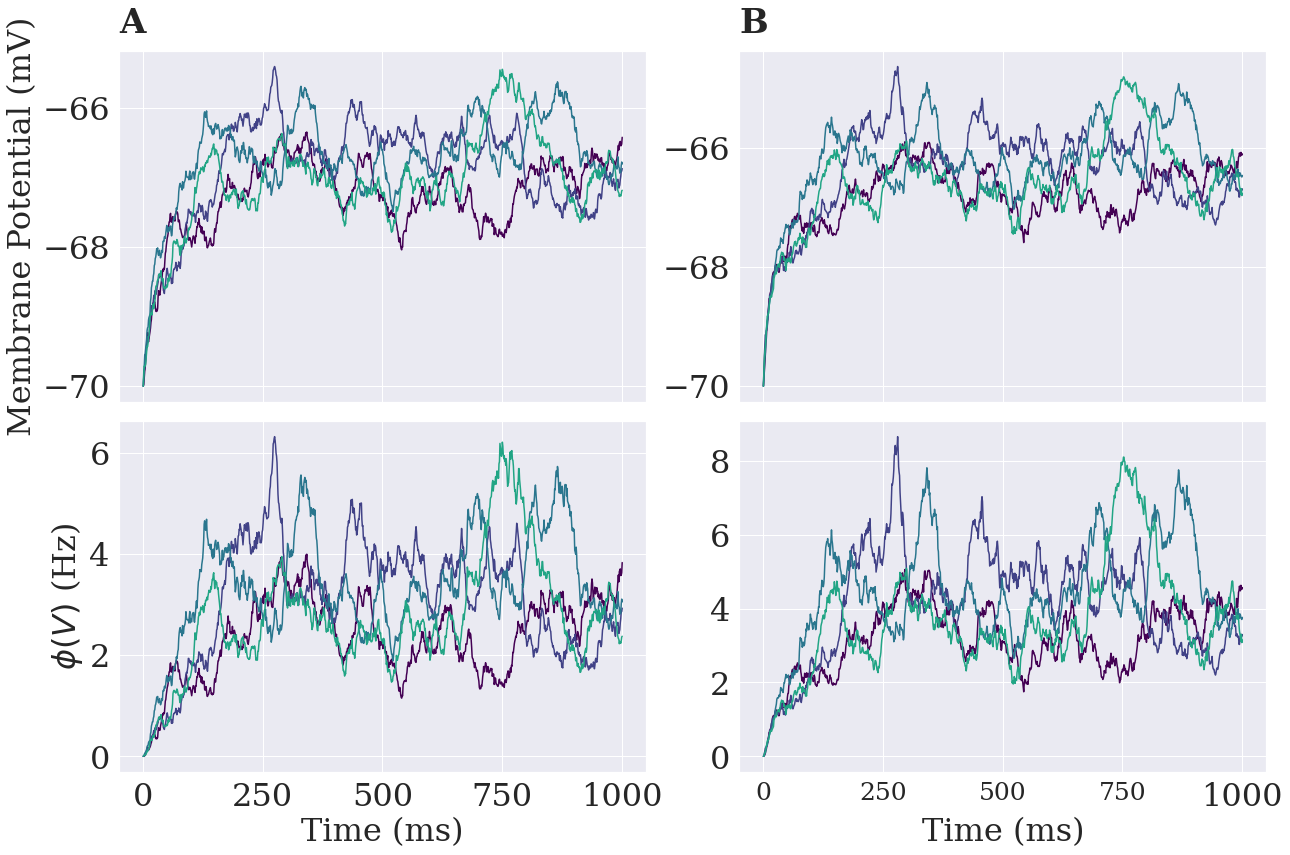

In [8]:
# Plot 4 samples of E and I potentials and firing rate (under the transfer function approximation) across time

fig, ax = plt.subplots(2,2, figsize = (18,12))

for i in range(4):

    Ve, Vi, phi_e, phi_i = simulate_ssn_noise(N_t, dt,  Ve_init, Vi_init, V_rest, u_e, u_i, sigma_e, sigma_i, tau_e, tau_i, Wee, Wie, Wei, Wii, k, n, V0)


    ax[0,0].plot(time,Ve[:-1],color=cm.viridis(i*50))
    ax[0,0].set_ylabel('Membrane Potential (mV)',size=32)
    plt.xticks(size=25)
    ax[0,0].tick_params(axis='x', labelsize=32)
    ax[0,0].tick_params(axis='y', labelsize=32)
    ax[0,0].xaxis.set_ticklabels([]) 

    ax[0,1].plot(time,Vi[:-1],color=cm.viridis(i*50))
    plt.xticks(size=25)
    ax[0,1].tick_params(axis='x', labelsize=32)
    ax[0,1].tick_params(axis='y', labelsize=32)
    ax[0,1].xaxis.set_ticklabels([]) 
    ax[1,0].plot(time,phi_e,color=cm.viridis(i*50))
    ax[1,0].set_xlabel('Time (ms)',size=32)
    ax[1,0].set_ylabel('$\phi(V)$ (Hz)',size=32)
    plt.xticks(size=25)
    ax[1,0].tick_params(axis='x', labelsize=32)
    ax[1,0].tick_params(axis='y', labelsize=32)
    ax[1,1].plot(time,phi_i,color=cm.viridis(i*50))
    ax[1,1].set_xlabel('Time (ms)',size=32)
    ax[1,1].tick_params(axis='x', labelsize=32)
    ax[1,1].tick_params(axis='y', labelsize=32)
    plt.xticks(size=25)
ax[0,1].text(0,1.05,"B",transform=ax[0,1].transAxes,fontsize=34,weight='bold')
ax[0,0].text(0,1.05,"A",transform=ax[0,0].transAxes,fontsize=34,weight='bold')
plt.tight_layout()
plt.show()

fig.savefig('/Users/josehernandez/Documents/The University of Edinburgh/Academics/SEM2/CCN/Assignment 1/Fig6.png',dpi=300)

    

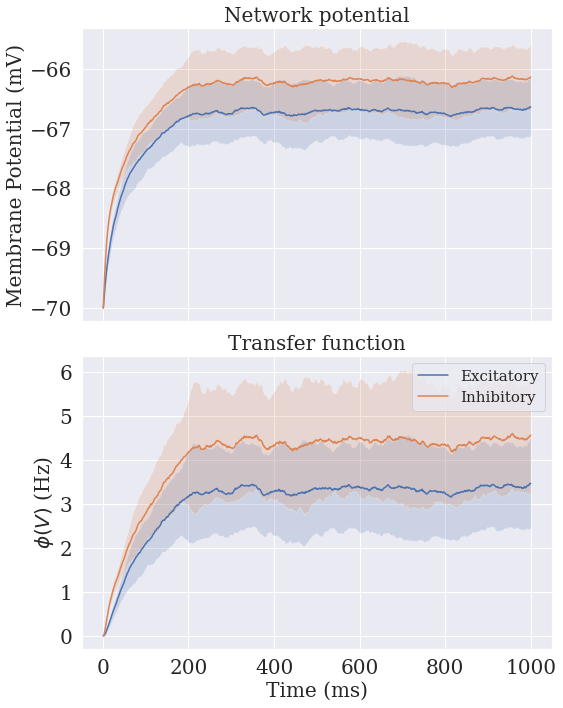

In [9]:
# Additional plot to capture mean and estimated error for different noisy curves

n_sim = 100

Ve_list = []
Vi_list = []
phi_e_list = []
phi_i_list = []

for i in range(n_sim):
    Ve, Vi, phi_e, phi_i = simulate_ssn_noise(N_t, dt,  Ve_init, Vi_init, V_rest, u_e, u_i, sigma_e, sigma_i, tau_e, tau_i, Wee, Wie, Wei, Wii, k, n, V0)
    
    Ve_list.append(Ve)
    Vi_list.append(Vi)
    phi_e_list.append(phi_e)
    phi_i_list.append(phi_i)
    
    
Ve_mean = np.mean(Ve_list,axis=0)
Vi_mean = np.mean(Vi_list,axis=0)
phi_e_mean = np.mean(phi_e_list,axis=0)
phi_i_mean = np.mean(phi_i_list,axis=0)

Ve_std = np.std(Ve_list,axis=0)
Vi_std = np.std(Vi_list,axis=0)
phi_e_std = np.std(phi_e_list,axis=0)
phi_i_std = np.std(phi_i_list,axis=0)
    
    
fig, ax = plt.subplots(2,1, figsize = (8,10))
ax[0].plot(time,Ve_mean[:-1],label="$V_e$")
ax[0].set_title('Network potential')
ax[0].set_ylabel('Membrane Potential (mV)')
ax[0].fill_between(time, Ve_mean[:-1]+Ve_std[:-1], Ve_mean[:-1]-Ve_std[:-1],alpha=0.2)
ax[0].plot(time,Vi_mean[:-1],label="$V_i$")
ax[0].fill_between(time, Vi_mean[:-1]+Vi_std[:-1], Vi_mean[:-1]-Vi_std[:-1],alpha=0.2)
ax[1].plot(time,phi_e_mean,label="Excitatory")
ax[1].set_title('Transfer function')
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('$\phi(V)$ (Hz)')
ax[1].fill_between(time, phi_e_mean+phi_e_std, phi_e_mean-phi_e_std,alpha=0.2)
ax[1].plot(time,phi_i_mean,label = "Inhibitory")
ax[1].fill_between(time, phi_i_mean+phi_i_std, phi_i_mean-phi_i_std,alpha=0.2)
ax[0].xaxis.set_ticklabels([]) 

plt.tight_layout()
plt.legend(prop = {'size': 15})

plt.show()
fig.savefig('/Users/josehernandez/Documents/The University of Edinburgh/Academics/SEM2/CCN/Assignment 1/Fig7.png',dpi=400)



Question 5

In [10]:
# Contruct simulation function for varying values of $\mu$

def simulate_ssn_increasing_u(dt,  Ve_init, Vi_init, V_rest, sigma_e, sigma_i, tau_e, tau_i, Wee, Wie, Wei, Wii, k, n, V0, noise=False): 
    
    """
    Inputs:
    dt: Euler's method timestep measurement
    Ve_init: Initial condition for E potential
    Vi_init: Initial condition for I potential
    V_rest: Resting potential
    sigma_e: standard deviation for the feedforward E current
    sigma_i: standard deviation for the feedforward I current
    tau_e: E neuron time constant
    tau_i: I neuron time constant
    Wee, Wie, Wei, Wii: Weights for recurrent connections between E and I neurons
    k: k parameter for transfer function
    n: n parameter for transfer function
    V0: V_0 threshold for transfer function
    noise: Boolean to indicate presence of noise
    
    Returns:
    Ve: list of every E potential value for each timestep
    Vi: list of every I potential value for each timestep
    phi_e: list of every E firing rate value from transfer function for each timestep
    phi_i: list of every E firing rate value from transfer function for each timestep
    
    """
    
    
    N_t = 9000
    Ve = np.zeros([N_t+1])
    Vi = np.zeros([N_t+1])
    phi_e = np.zeros([N_t])
    phi_i = np.zeros([N_t])
    
    u_e = 0
    u_i = 0
    
    
    if noise==False:
        
        

        Ve[0] = Ve_init
        Vi[0] = Vi_init

        for t in range(1,N_t+1):
            
            if (t > 3000) and (t <= 6000):
                u_e = 2
                u_i = 2
            elif t > 6000:
                u_e = 15
                u_i = 15
            
            phi_e[t-1] = phi(Ve[t-1], k, n, V0)
            phi_i[t-1] = phi(Vi[t-1], k, n, V0)

            dVe = -(Ve[t-1] - V_rest) + Wee * phi_e[t-1] - Wei * phi_i[t-1] + u_e
            dVi = -(Vi[t-1] - V_rest) + Wie * phi_e[t-1] - Wii * phi_i[t-1] + u_i
            Ve[t] = Ve[t-1] + 1/tau_e * dt * dVe
            Vi[t] = Vi[t-1] + 1/tau_i * dt * dVi
            
    else:

        

        Ve[0] = Ve_init
        Vi[0] = Vi_init

        for t in range(1,N_t+1):
            
            if (t > 3000) and (t <= 6000):
                u_e = 2
                u_i = 2
            elif t > 6000:
                u_e = 15
                u_i = 15
            
            
            mu_e = u_e + sigma_e*np.random.randn(1)
            mu_i = u_i + sigma_i*np.random.randn(1)

            phi_e[t-1] = phi(Ve[t-1], k, n, V0)
            phi_i[t-1] = phi(Vi[t-1], k, n, V0)

            dVe = -(Ve[t-1] - V_rest) + Wee * phi_e[t-1] - Wei * phi_i[t-1] + mu_e
            dVi = -(Vi[t-1] - V_rest) + Wie * phi_e[t-1] - Wii * phi_i[t-1] + mu_i
            Ve[t] = Ve[t-1] + 1/tau_e * dt * dVe
            Vi[t] = Vi[t-1] + 1/tau_i * dt * dVi
        
        
        
    return Ve, Vi, phi_e, phi_i


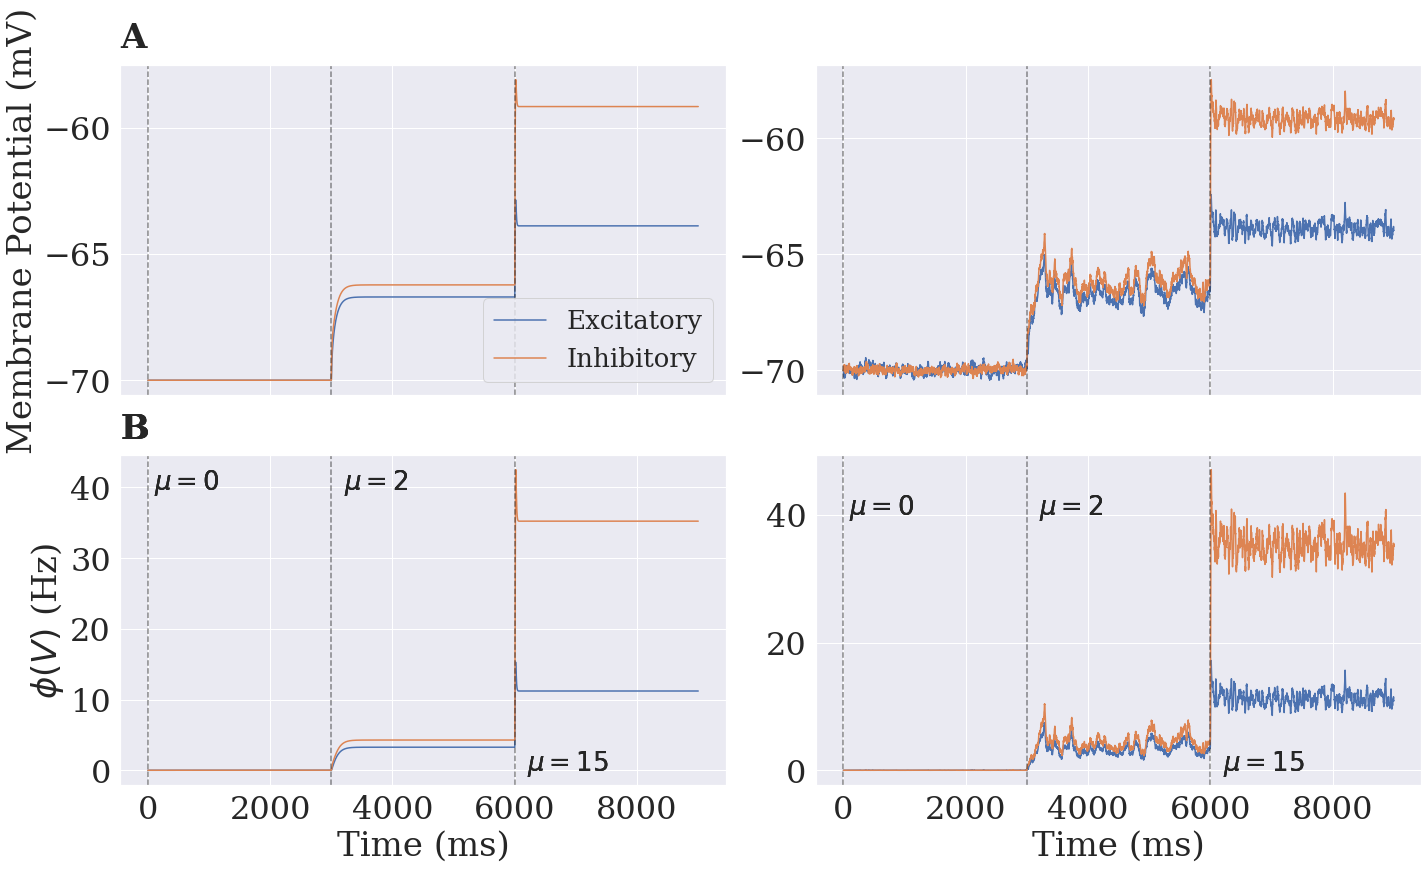

In [11]:
# Plot E and I membrane potentials for a varying protocol of $\mu$ values

sigma_e = 1
sigma_i = .5
noise = False



Ve, Vi, phi_e, phi_i = simulate_ssn_increasing_u(dt,  Ve_init, Vi_init, V_rest, sigma_e, sigma_i, tau_e, tau_i, Wee, Wie, Wei, Wii, k, n, V0, noise)

time = np.linspace(1,9000,9000)



fig, ax = plt.subplots(2,2, figsize = (20,12))
ax[0,0].plot(time,Ve[:-1],label='Excitatory')
ax[0,0].plot(time,Vi[:-1],label='Inhibitory')

ax[0,0].text(0,1.05,"A",transform=ax[0,0].transAxes,fontsize=34,weight='bold')
ax[0,0].set_ylabel('Membrane Potential (mV)',size=34)
ax[1,0].plot(time,phi_e)
ax[1,0].set_xlabel('Time (ms)',size=34)
ax[1,0].plot(time,phi_i)

ax[1,0].set_ylabel('$\phi(V)$ (Hz)',size=34)


noise = True

Ve, Vi, phi_e, phi_i = simulate_ssn_increasing_u(dt,  Ve_init, Vi_init, V_rest, sigma_e, sigma_i, tau_e, tau_i, Wee, Wie, Wei, Wii, k, n, V0, noise)

time = np.linspace(1, 9000, 9000)

xposition = [0,3000, 6000]

ax[0,1].plot(time, Ve[:-1])
ax[0,1].plot(time, Vi[:-1])

ax[1,1].plot(time, phi_e, label = "Excitatory")
ax[1,1].plot(time, phi_i, label = "Inhibitory")
ax[1,1].set_xlabel('Time (ms)',size=34)


for xc in xposition:
    ax[0,0].axvline(x=xc, color='k', linestyle='--',alpha=0.5)
    ax[0,0].tick_params(axis='x', labelsize=32)
    ax[0,0].tick_params(axis='y', labelsize=32)
    ax[0,0].xaxis.set_ticklabels([]) 
    ax[1,0].axvline(x=xc, color='k', linestyle='--',alpha=0.5)
    ax[1,0].annotate("$\mu = 0$",xy=(100,39.7),size=26)
    ax[1,0].annotate("$\mu = 2$",xy=(3200,39.7),size=26)
    ax[1,0].annotate("$\mu = 15$",xy=(6200,0),size=26)
    ax[1,0].tick_params(axis='x', labelsize=32)
    ax[1,0].tick_params(axis='y', labelsize=32)
    ax[1,0].text(0,1.05,"B",transform=ax[1,0].transAxes,fontsize=34,weight='bold')

    ax[0,1].axvline(x=xc, color='k', linestyle='--',alpha=0.5)
    ax[0,1].tick_params(axis='x', labelsize=32)
    ax[0,1].tick_params(axis='y', labelsize=32)
    ax[0,1].xaxis.set_ticklabels([]) 
    ax[1,1].axvline(x=xc, color='k', linestyle='--',alpha=0.5)
    ax[1,1].annotate("$\mu = 0$",xy=(100,40),size=26)
    ax[1,1].annotate("$\mu = 2$",xy=(3200,40),size=26)
    ax[1,1].annotate("$\mu = 15$",xy=(6200,0),size=26)
    ax[1,1].tick_params(axis='x', labelsize=32)
    ax[1,1].tick_params(axis='y', labelsize=32)
    

plt.tight_layout()
ax[0,0].legend(prop = {'size': 26})
plt.show()
fig.savefig('/Users/josehernandez/Documents/The University of Edinburgh/Academics/SEM2/CCN/Assignment 1/Fig8.png',dpi=400)




Question 6

In [12]:
# Construct lists to plot mean and standard deviation values for different values of $\mu$ for 100,000 timesteps

sigma_e = 1
sigma_i = .5
n=2
V_rest=-70
Ve_init = V_rest
Vi_init = V_rest
V0=-70
mu_list = np.linspace(0,20,50)
N_t = 100000

Ve_mean = []
Vi_mean = []
phi_e_mean = []
phi_i_mean = []

Ve_std = []
Vi_std = []
phi_e_std = []
phi_i_std = []

for mu in mu_list:
    
    mu_e = mu
    mu_i = mu

    Ve, Vi, phi_e, phi_i = simulate_ssn_noise(N_t, dt,  Ve_init, Vi_init, V_rest, mu_e, mu_i, sigma_e, sigma_i, tau_e, tau_i, Wee, Wie, Wei, Wii, k, n, V0)
    
    Ve_mean.append(np.mean(Ve))
    Vi_mean.append(np.mean(Vi))
    phi_e_mean.append(np.mean(phi_e))
    phi_i_mean.append(np.mean(phi_i))
    
    Ve_std.append(np.std(Ve))
    Vi_std.append(np.std(Vi))
    phi_e_std.append(np.std(phi_e))
    phi_i_std.append(np.std(phi_i))


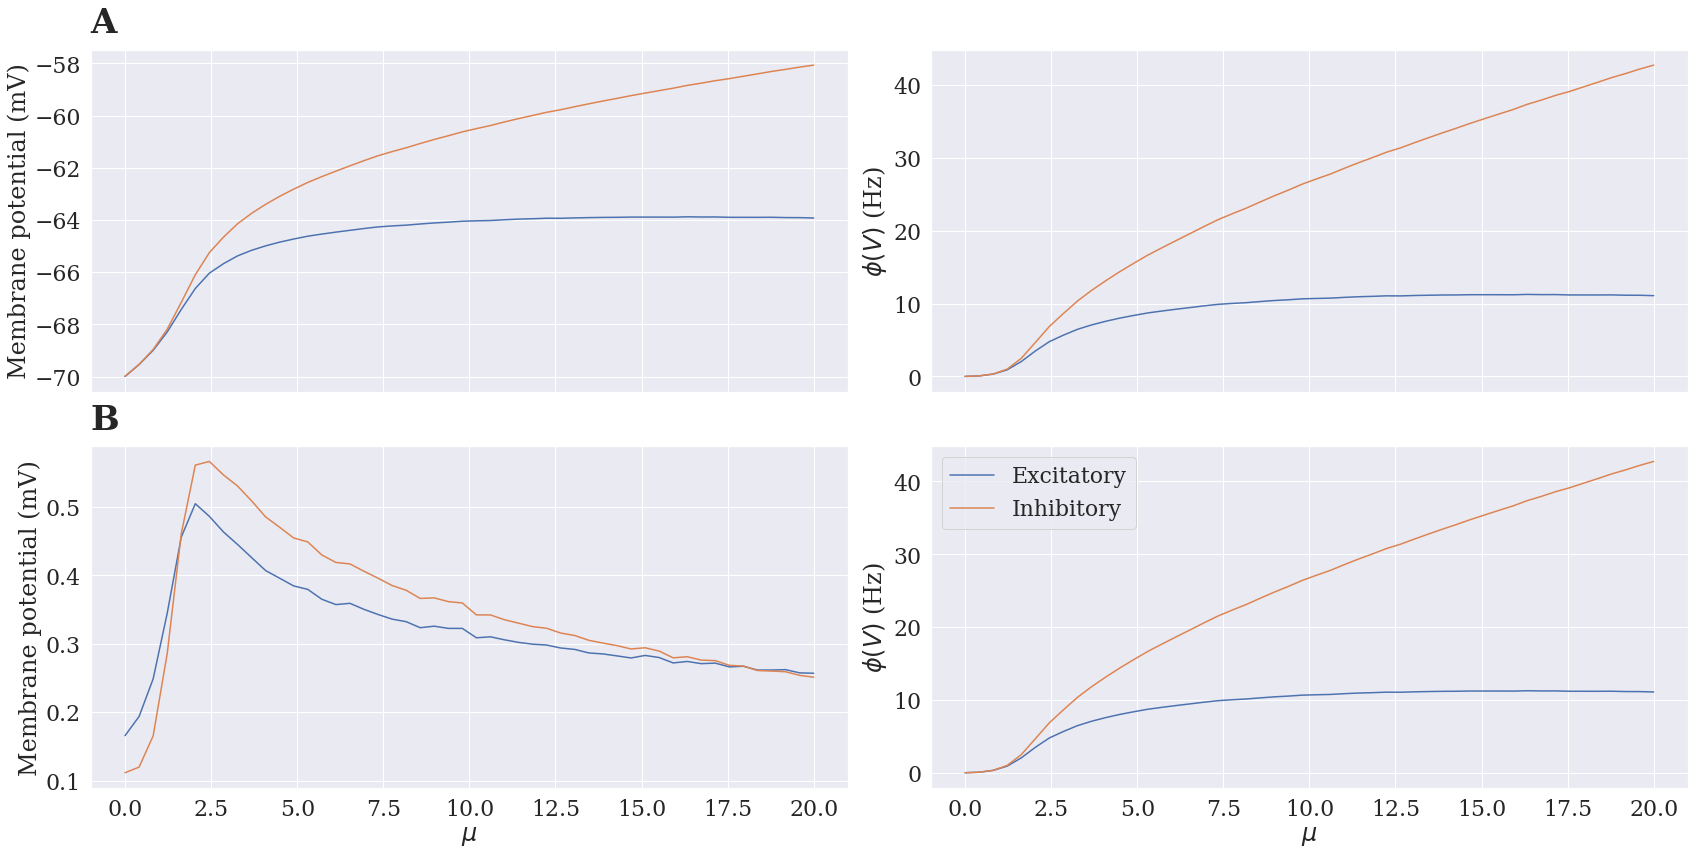

In [13]:
# Plot mean and standard deviation values for different values of $\mu$

fig, ax = plt.subplots(2,2, figsize = (24,12))
ax[0,0].plot(mu_list,Ve_mean)
ax[0,0].plot(mu_list,Vi_mean)
ax[0,0].set_ylabel('Membrane potential (mV)',size=24)
ax[0,0].tick_params(axis='x', labelsize=22)
ax[0,0].tick_params(axis='y', labelsize=22)


ax[0,1].plot(mu_list,phi_e_mean)
ax[0,1].plot(mu_list,phi_i_mean)
ax[0,1].set_ylabel('$\phi(V)$ (Hz)',size=24)
ax[0,1].tick_params(axis='x', labelsize=22)
ax[0,1].tick_params(axis='y', labelsize=22)


ax[1,0].plot(mu_list,Ve_std)
ax[1,0].plot(mu_list,Vi_std)
ax[1,0].set_xlabel('$\mu$',size=24)
ax[1,0].set_ylabel('Membrane potential (mV)',size=24)
ax[1,0].tick_params(axis='x', labelsize=22)
ax[1,0].tick_params(axis='y', labelsize=22)


ax[1,1].plot(mu_list, phi_e_mean, label = "Excitatory")
ax[1,1].plot(mu_list, phi_i_mean, label = "Inhibitory")
ax[1,1].set_xlabel('$\mu$',size=24)
ax[1,1].set_ylabel('$\phi(V)$ (Hz)',size=24)
ax[1,1].tick_params(axis='x', labelsize=22)
ax[1,1].tick_params(axis='y', labelsize=22)

ax[1,0].text(0,1.05,"B",transform=ax[1,0].transAxes,fontsize=34,weight='bold')
ax[0,0].text(0,1.05,"A",transform=ax[0,0].transAxes,fontsize=34,weight='bold')
ax[0,0].xaxis.set_ticklabels([]) 
ax[0,1].xaxis.set_ticklabels([]) 

plt.tight_layout()
plt.legend(prop = {'size': 22})

plt.show()
fig.savefig('/Users/josehernandez/Documents/The University of Edinburgh/Academics/SEM2/CCN/Assignment 1/Fig9.png',dpi=400)
